# Import libraries

In [1]:
#data analysis libraries
import numpy as np
import pandas as pd
import datetime

#visualization libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Pre-Processing 

In [2]:
#read to data
data = pd.read_csv('avocado.csv')

#drop the useless column
data = data.drop(['Unnamed: 0'], axis = 1) 
names = ["date", "avprice", "totalvol", "small","large","xlarge","totalbags","smallbags","largebags","xlargebags","type","year","region"] #get new column names

#rename columns
data = data.rename(columns=dict(zip(data.columns, names))) 
data.head()

,date,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,type,year,region
0,27-12-15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1517 non-null   object 
 1   avprice     1517 non-null   float64
 2   totalvol    1517 non-null   float64
 3   small       1517 non-null   float64
 4   large       1517 non-null   float64
 5   xlarge      1517 non-null   float64
 6   totalbags   1517 non-null   float64
 7   smallbags   1517 non-null   float64
 8   largebags   1517 non-null   float64
 9   xlargebags  1517 non-null   float64
 10  type        1517 non-null   object 
 11  year        1517 non-null   int64  
 12  region      1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


In [4]:
data = data.sort_values("date")

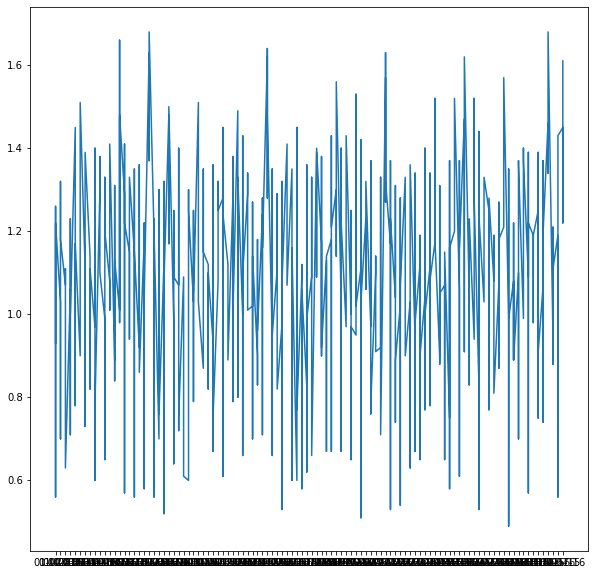

In [5]:
plt.figure(figsize=(10,10))
plt.plot(data['date'], data['avprice'])

In [6]:
data

,date,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,type,year,region
1059,01-02-15,0.93,4924049.79,3656338.95,451194.73,40258.76,776257.35,359145.48,417111.87,0.00,conventional,2015,Southeast
430,01-02-15,1.06,283137.88,42732.12,168621.69,851.33,70932.74,69529.64,1403.10,0.00,conventional,2015,HarrisburgScranton
807,01-02-15,0.56,1544750.92,1194635.06,261342.47,6335.66,82437.73,82437.73,0.00,0.00,conventional,2015,PhoenixTucson
1111,01-02-15,0.97,135656.36,35897.25,84741.31,2704.69,12313.11,12276.59,36.52,0.00,conventional,2015,Spokane
1202,01-02-15,0.89,44655461.51,18933038.04,18956479.74,1381516.11,5384427.62,4216452.03,1121076.47,46899.12,conventional,2015,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,31-05-15,0.93,5874982.36,3094129.71,1835735.00,129139.05,815978.60,665541.84,150400.52,36.24,conventional,2015,West
671,31-05-15,1.43,1493218.75,24958.80,1077663.26,1368.92,389227.77,322139.90,67077.51,10.36,conventional,2015,NewYork
1419,31-07-16,1.45,108088.47,1792.17,64652.42,54.78,41589.10,40894.10,0.00,695.00,conventional,2016,BuffaloRochester
1471,31-07-16,1.22,5947160.29,1922055.35,2069409.78,244730.21,1710964.95,1581210.71,95425.63,34328.61,conventional,2016,California


# EDA

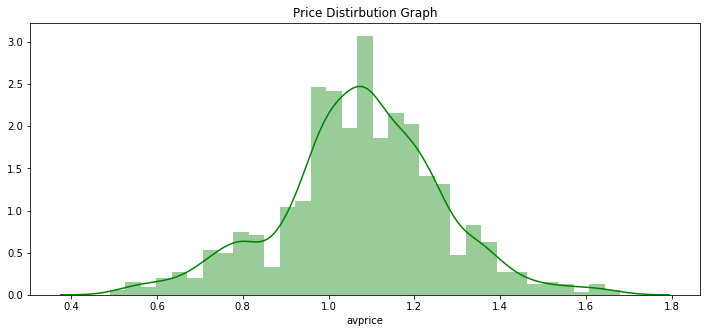

In [7]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(data["avprice"], color = 'g')

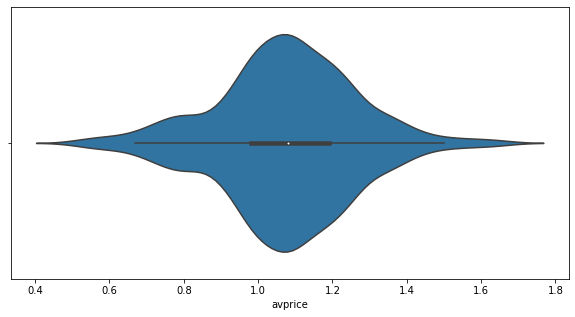

In [8]:
#weight distribution of Prices
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(data.dropna(subset = ['avprice']).avprice)

Text(0.5, 1.0, 'Average Price')

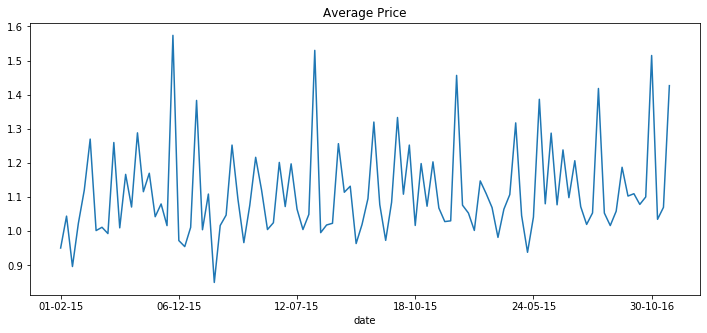

In [9]:
#price distribution graph
dategroup=data.groupby('date').mean()
plt.figure(figsize=(12,5))
dategroup['avprice'].plot(x=data.date)
plt.title('Average Price')

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

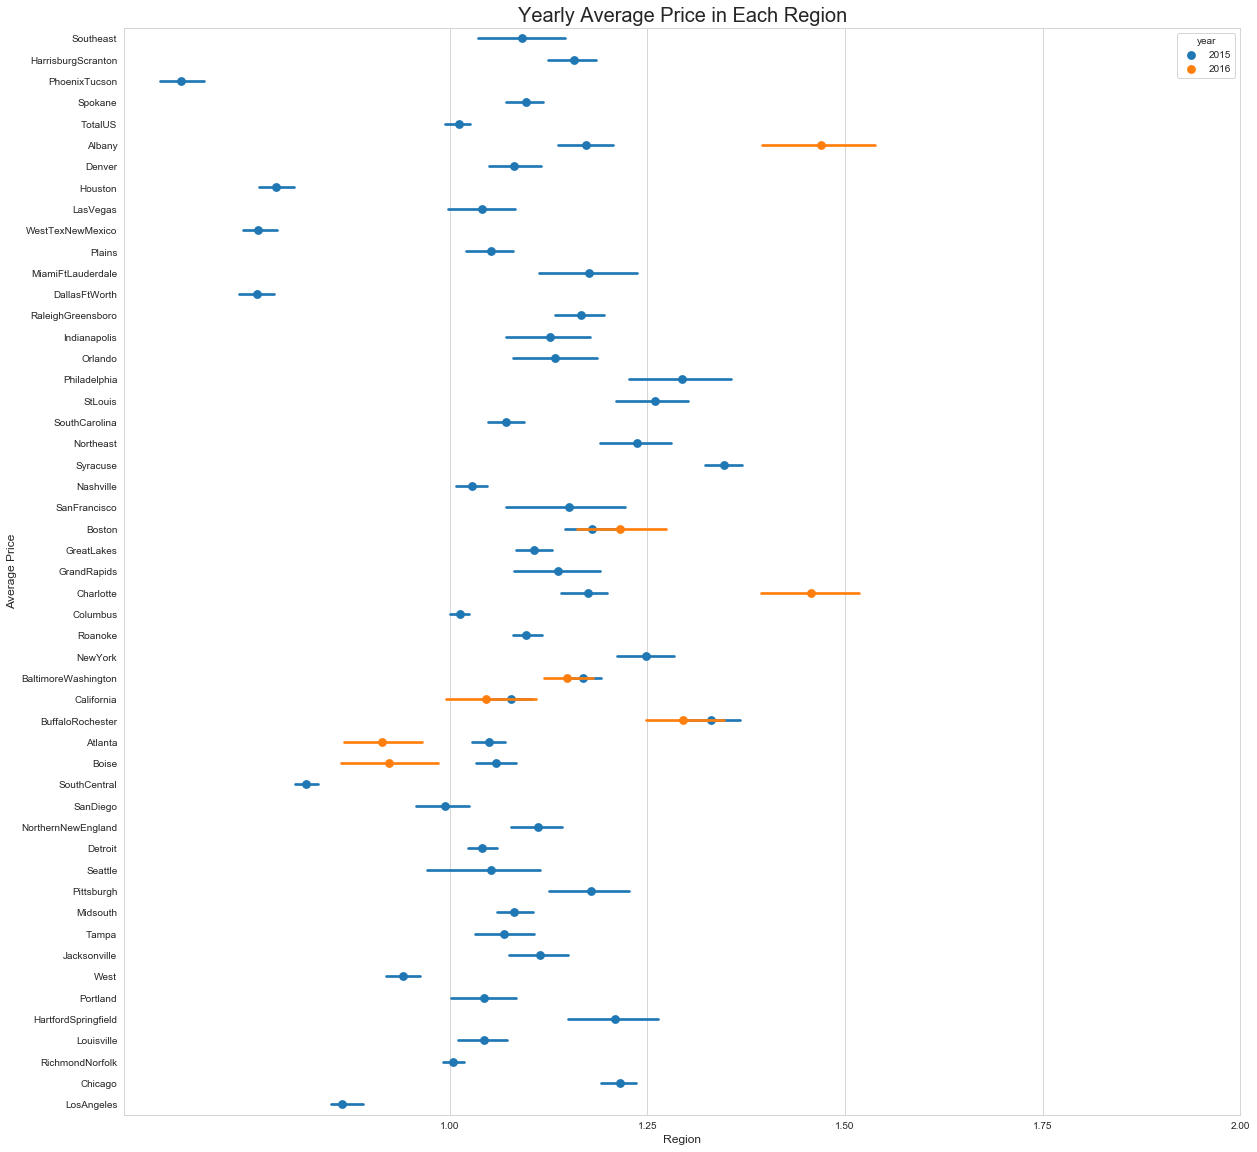

In [10]:
#yearly average price in each region
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(x='avprice',y='region',data=data, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

Text(0.5, 1.0, 'Type Average Price in Each Region')

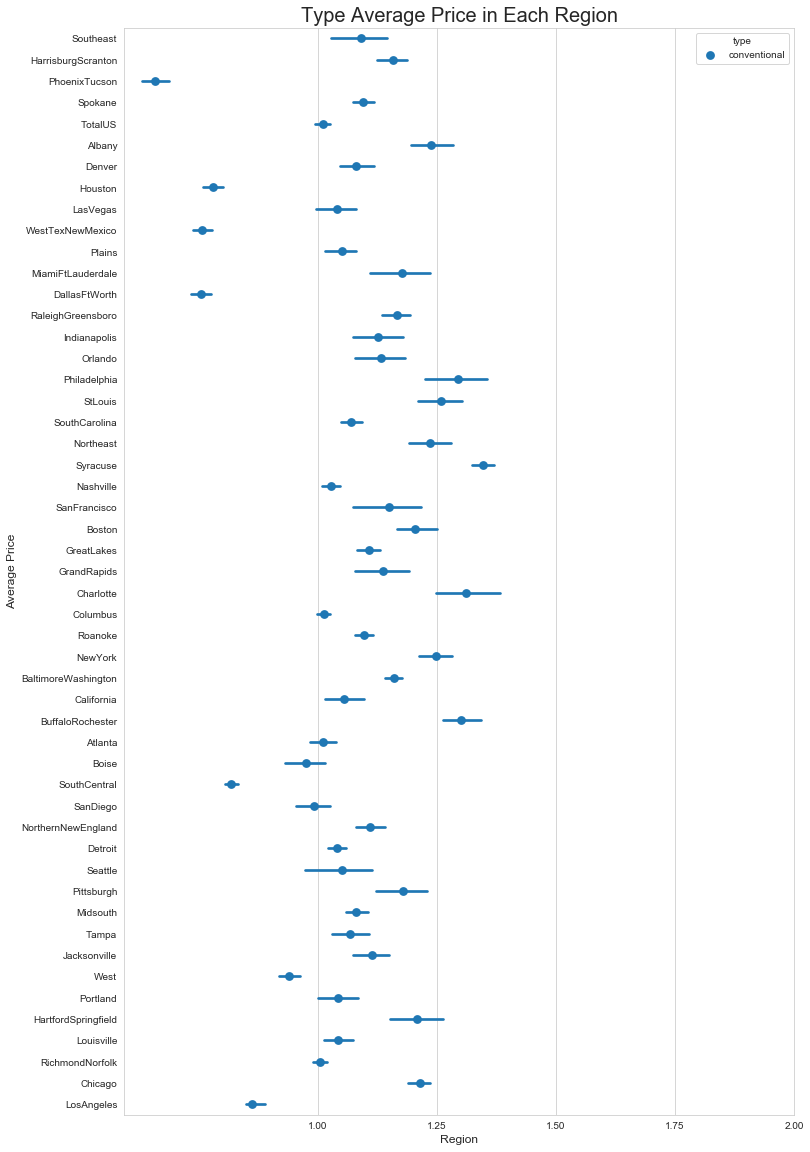

In [11]:
#type average price in each region
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='avprice',y='region',data=data, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

# Correlation

In [12]:
data.corr()

,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,year
avprice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
totalvol,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
small,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
large,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
xlarge,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
totalbags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
smallbags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
largebags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
xlargebags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


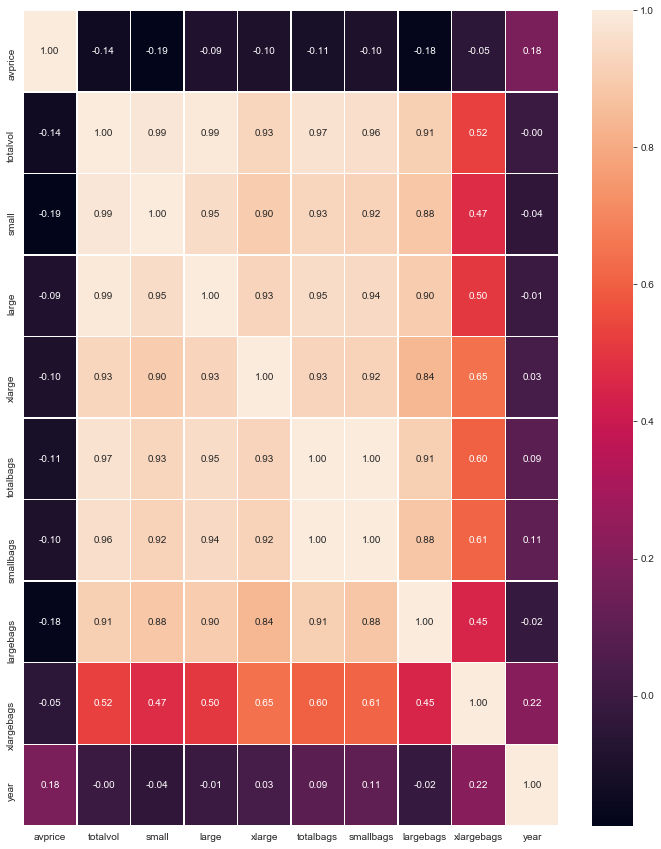

In [13]:
import matplotlib.pyplot as plt
plt.figure (figsize =(12,15))
sns.heatmap (data.corr(), annot=True, linewidths=0.5, fmt='.2f')

In [ ]:
data.describe()

# Time Series Analysis

In [ ]:
# Install pystan with pip before using pip to install fbprophet
! pip install pystan
! pip install fbprophet

In [ ]:
#importing fbprophet
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = data.loc[:, ["date","avprice"]]
df['date'] = pd.DatetimeIndex(df['date'])
df.dtypes

In [ ]:
df = df.rename(columns={'date': 'ds',
                        'avprice': 'y'})

In [ ]:
#call Prophet Model
my_model = Prophet()
my_model.fit(df)

future_dates = my_model.make_future_dataframe(periods=900)
forecast =my_model.predict(future_dates)

In [ ]:
fig2 = my_model.plot_components(forecast)

In [ ]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2018-03-24") & (forecastnew['ds'] <= "2020-09-10")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2015-01-04") & (forecastnew['ds'] <= "2018-03-25")
forecastnew = forecastnew.loc[mask]

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Average Prices')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")